In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0, 9.0)
%matplotlib inline

In [99]:
brain = pd.read_csv("brain.csv")

In [100]:
brain.shape

(237, 4)

In [101]:
brain.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [102]:
brain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [103]:
brain.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


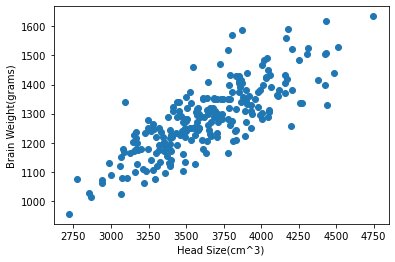

In [104]:
X = brain['Head Size(cm^3)'].values
y = brain['Brain Weight(grams)'].values
plt.scatter(X,y)
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()

In [105]:
X = np.column_stack([np.ones(len(brain), dtype = np.float32), brain["Head Size(cm^3)"].values])
y = brain['Brain Weight(grams)'].values

def cal_coeff(X, y):
    coeff = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
    return coeff

def predict(new_x, coeff):
    y_pred = np.dot(new_x, coeff)
    return y_pred
                   
x_test = float(input())
                   
coeff = cal_coeff(X,y) # b0 - Intercept, b1 - Slope
print(f'Intercept: {coeff[0]} Slope : {coeff[1]}')
  
# add ones to x_matrix
    
if np.isscalar(x_test):
    new_x = np.array([1, x_test])
else:
    new_x = np.column_stack(np.ones(len(x_test), dtype = np.float32), x_test)

y_test = predict(X, coeff)
print(f'Brain weight prediction for {x_test} is {predict(new_x, coeff)}')
print()
                                     
# Model Evaluation 

SSE = sum((y - y_test)**2)
SST = sum((y - np.mean(y))**2)
n = len(X)
q = len(coeff)
k = len(coeff)
MSE = SSE/(n - q)
MST = SST/(n - 1)

R_squared = 1 - (SSE/SST) # R Square
Adj_Rsquared = 1 - (MSE/MST) # Adjusted R Square
std_err = np.sqrt(MSE) # Standard Error or root mean Squared Error
MSR = (SST - SSE)/(q - 1) # Mean Squared regression
f_static = MSR/MSE # F Statistics
MAPE = sum(np.abs(y-y_test))/n # Mean Absolute Percentage Error

print(f'R Squared: {R_squared}\n\nAdj. R-Squared: {Adj_Rsquared}\n\nStd.Error: {std_err}\n\nF Static: {f_static}\n')
print(f'MeanAbsPercErr. : {MAPE}')

768
Intercept: 325.5734210494411 Slope : 0.2634293394893916
Brain weight prediction for 768.0 is 527.8871537772939

R Squared: 0.6393117199570002

Adj. R-Squared: 0.6377768762121363

Std.Error: 72.42686743269371

F Static: 416.5321206776783

MeanAbsPercErr. : 56.36724079565002


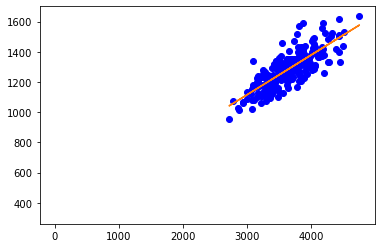

In [107]:
# Ploting regression line

regression_line = []
for x in X:
    regression_line.append((coeff[1] * x) + coeff[0])

plt.scatter(brain["Head Size(cm^3)"].values, brain['Brain Weight(grams)'].values, color = 'b')
plt.plot(X, regression_line)
plt.show()